In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath(".."))
from eval import *

# Uni-modal testing

In [2]:
data = pd.read_csv('dummy_data.csv').values
x = data[:, :5]
y_true = data[:, 5:7]
y_pred = data[:, 7:9]

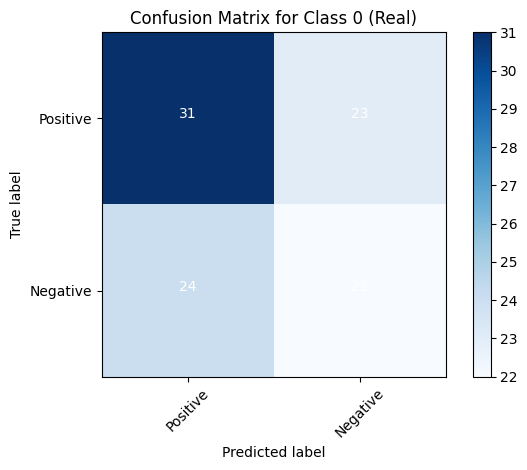

In [3]:
cm = confusion_matrix(y_true, y_pred, class_idx=0)

plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for Class 0 (Real)')
plt.colorbar()

tick_marks = np.arange(len(['Positive', 'Negative']))
plt.xticks(tick_marks, ['Positive', 'Negative'], rotation=45)
plt.yticks(tick_marks, ['Positive', 'Negative'])

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment='center',
                    color='white' if cm[i, j] > thresh else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

Average Precision (AP)= 44.66%


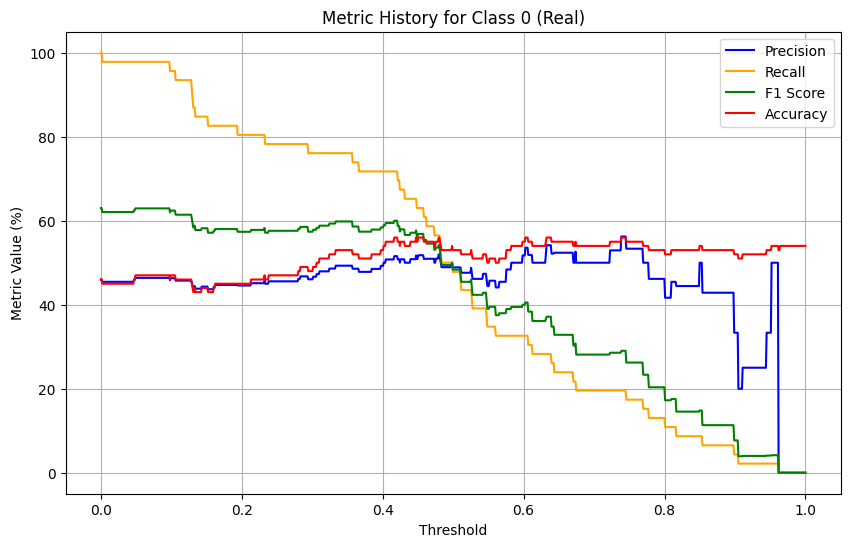

In [4]:
prec_hist = metric_history(precision, y_true, y_pred, class_idx=0, num_samples=1000)
rec_hist = metric_history(recall, y_true, y_pred, class_idx=0, num_samples=1000)
f1_hist = metric_history(f1_score, y_true, y_pred, class_idx=0, num_samples=1000)
acc_hist = metric_history(accuracy, y_true, y_pred, class_idx=0, num_samples=1000)

print(f"Average Precision (AP)= {average_precision(y_true, y_pred, class_idx=0, num_samples=1000):.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0.0, 1.0, 1000), prec_hist, label='Precision', color='blue')
plt.plot(np.linspace(0.0, 1.0, 1000), rec_hist, label='Recall', color='orange')
plt.plot(np.linspace(0.0, 1.0, 1000), f1_hist, label='F1 Score', color='green')
plt.plot(np.linspace(0.0, 1.0, 1000), acc_hist, label='Accuracy', color='red')
plt.xlabel('Threshold')
plt.ylabel('Metric Value (%)')
plt.title('Metric History for Class 0 (Real)')
plt.legend()
plt.grid()
plt.show()

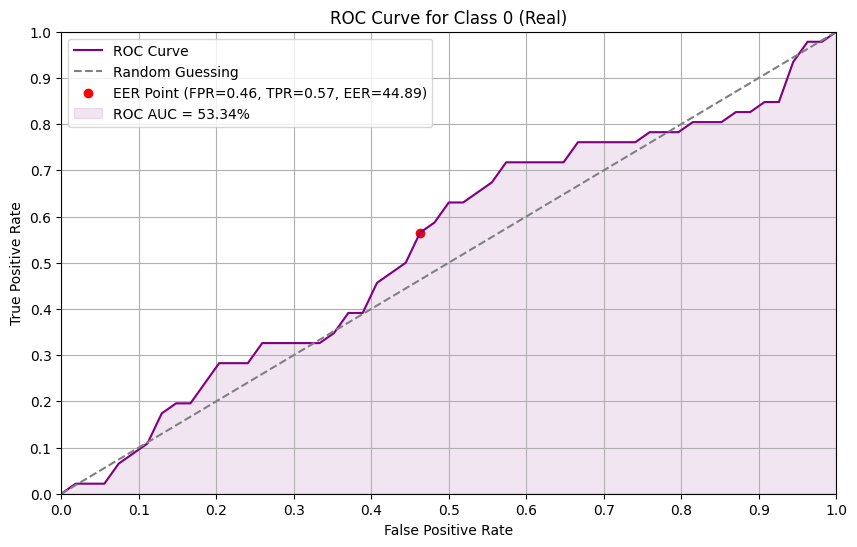

In [5]:
fpr, tpr, t = roc_curve(y_true, y_pred, class_idx=0, num_samples=1000, sorted=True)
area = roc_auc(y_true, y_pred, class_idx=0, num_samples=1000)
eer = equal_error_rate(y_true, y_pred, class_idx=0, num_samples=1000)

eer_index = np.argmin(np.abs(fpr - (1 - tpr)))

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.scatter(fpr[eer_index], tpr[eer_index], color='red', label=f'EER Point (FPR={fpr[eer_index]:.2f}, TPR={tpr[eer_index]:.2f}, EER={eer:.2f})')
plt.axvline(x=1 - eer, color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.fill_between(fpr, tpr, alpha=0.1, color='purple', label=f'ROC AUC = {area:.2f}%')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 0 (Real)')
plt.grid()
plt.legend()
plt.show()